In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
mockfile = "/global/cscratch1/sd/forero/mocks/MDplanck1GpcNew/Rockstar/subbox_0_selected_hlist_1.00000.list"
hubble = 0.678

def read_data(filename):
    dtype=[('mvir','f8'),('rvir', 'f8'), ('vrms', 'f8'),('vmax','f8'),
           ('x', 'f8'), ('y', 'f8'), ('z', 'f8'),
           ('vx', 'f8'), ('vy', 'f8'), ('vz', 'f8'),
           ('mvirall', 'f8')]
    data = np.loadtxt(filename, dtype=dtype)
    return data

In [3]:
snap_data = read_data(mockfile)

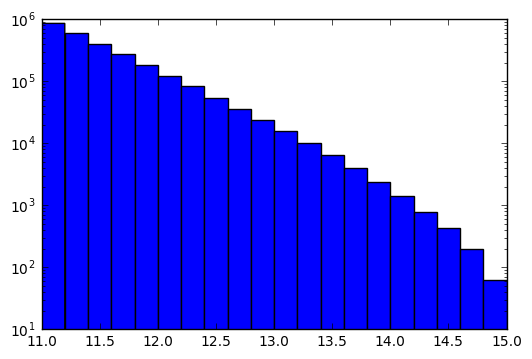

In [4]:
a = plt.hist(np.log10(snap_data['mvir']/hubble), log=True, bins=np.linspace(11,15,21))

In [5]:
mw_ii = (snap_data['mvir']/hubble > 1E12) & (snap_data['mvir']/hubble < 4E12) 
mw_data = snap_data[mw_ii]

In [42]:
def select_center(snap_data, center_x=0.0, center_y=0.0, center_z=0.0):
    x = snap_data['x'] - center_x
    y = snap_data['y'] - center_y
    z = snap_data['z'] - center_z
    r  = np.sqrt(x**2 + y**2 + z**2)
    ii_min = np.argmin(r)
    center_data = snap_data[ii_min]
    return center_data

In [43]:
def cut_sphere(input_data, center_data, max_radial_vel=3500.0):
    v_x = (input_data['x'] - center_data['x']) * 100  + (input_data['vx']-center_data['vx'])
    v_y = (input_data['y'] - center_data['y']) * 100  + (input_data['vy']-center_data['vy'])
    v_z = (input_data['z'] - center_data['z']) * 100  + (input_data['vz']-center_data['vz'])
    
    v_radial = np.sqrt(v_x**2 + v_y**2 + v_z**2)
    
    ii = v_radial < max_radial_vel
    new_data = input_data[ii]
    return new_data

In [61]:
all_center_x = [50.0,100.0, 150.0, 200.0, 250.0, 300.0, 350.0]
all_center_y = [50.0,100.0, 150.0, 200.0, 250.0, 300.0, 350.0]
all_center_z = [50.0,100.0, 150.0, 200.0, 250.0, 300.0, 350.0]
spheres  = {}
sphere_count = 0
for center_x in all_center_x:
    for center_y  in all_center_y:
        for center_z in all_center_z:
            mw_center = select_center(mw_data, center_x=center_x, center_y=center_y, center_z=center_z)
            spheres[sphere_count] = cut_sphere(snap_data, mw_center)
            print(sphere_count, len(spheres[sphere_count]['x']))
            sphere_count += 1

0 5468
1 5169
2 5647
3 8123
4 8679
5 5540
6 7869
7 5670
8 5791
9 7246
10 11019
11 13313
12 5572
13 2929
14 7565
15 4948
16 6409
17 10613
18 6450
19 6974
20 4826
21 6313
22 8400
23 5378
24 10706
25 6923
26 7449
27 8890
28 7432
29 6564
30 6472
31 7290
32 8494
33 5924
34 6165
35 5432
36 6958
37 8415
38 9481
39 8457
40 7411
41 5184
42 6410
43 6488
44 7009
45 10503
46 9196
47 8991
48 5923
49 4624
50 4629
51 6672
52 5218
53 11101
54 5079
55 6890
56 5113
57 5275
58 6878
59 7348
60 7359
61 5679
62 5078
63 5180
64 6163
65 9640
66 5799
67 2603
68 5245
69 7351
70 6502
71 6648
72 8839
73 9582
74 5850
75 6545
76 5829
77 10399
78 7542
79 14493
80 11333
81 6718
82 8199
83 11141
84 6162
85 7152
86 9285
87 9027
88 7616
89 6266
90 7374
91 7194
92 7685
93 5349
94 9040
95 4298
96 4560
97 7634
98 6068
99 8873
100 7575
101 8317
102 11876
103 9148
104 7136
105 5952
106 6287
107 6905
108 8203
109 8852
110 7116
111 6742
112 7838
113 3908
114 7558
115 9778
116 7569
117 6436
118 7883
119 9211
120 3669
121 8380
1

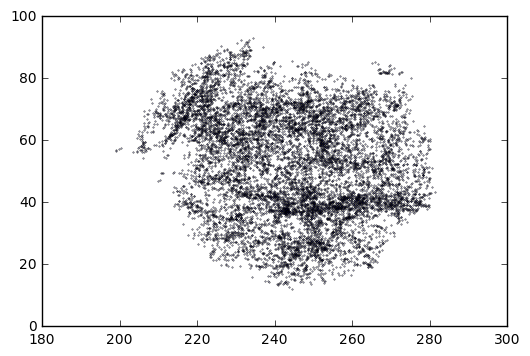

In [65]:
plt.scatter(spheres[200]['x'], spheres[200]['y'], s=0.1)

In [63]:
histos = {}
for i in spheres.keys():
    values, center = np.histogram(np.log10(spheres[i]['mvir']/hubble), bins=np.linspace(11,15,21))
    histos[i] = {'values':values, 'center': center[:-1]}

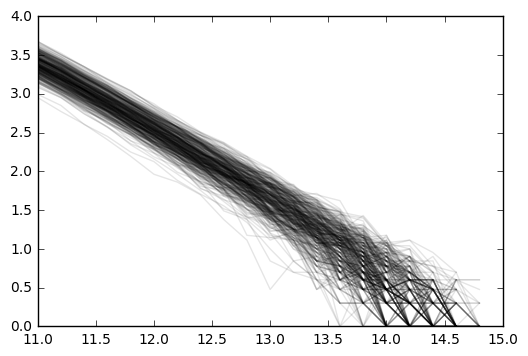

In [64]:
for i in spheres.keys():
    plt.plot(histos[i]['center'], np.log10(histos[i]['values']), alpha=0.1, color='black')

In [40]:
histos[i]['center']

array([ 11. ,  11.2,  11.4,  11.6,  11.8,  12. ,  12.2,  12.4,  12.6,
        12.8,  13. ,  13.2,  13.4,  13.6,  13.8,  14. ,  14.2,  14.4,
        14.6,  14.8])